<font color=black  face=Courier>

**Logistic Regression : Generalized linear model**

Aims: 
1. Derive the loss function for logistic regression
2. Under-fittinng and Over-fittinng of model, L1 and L2 Regularization Methods to slow down over-fitting
</font>






<font color=black  face=Courier>
    
-------------
    
**Logistic Regression - Derivation**


In last station, we learned Linear Regression function as follow:
    
$$ f(x) = w^{T}x + b $$
    
For every input x, the model output a y, so it is a model to solve Regression problem.
We let $ x^{'} = \begin{matrix}[1 & x]\end{matrix}^{T} $ and $ w^{'} = \begin{matrix}[b & w]\end{matrix}^{T}$, the function can be rewrite as:

$$ f(x) = {w^{'}}^{T} x^{'} $$
    
    
_Can we use Linear Regression to do a Classification task?_   
Obviously, the answer is NO. The output is values but not label of classes, and the range of linear model $ f(x) = {w^{'}}^{T} x^{'} $ is $(- \infty, \infty)$.
    
To tranfer the range to $[0,1]$, we can use sigmoid function:
    
$$ \sigma(x) = \frac {1} {1+e^{-x}}$$ 
</font>



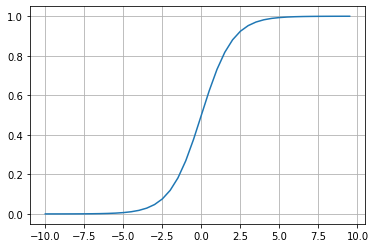

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-10., 10., 0.5)
y = sigmoid(x)

plt.grid()
plt.plot(x, y)

<font color=black  face=Courier>
    
Use the output of the linear regression model as the input of the sigmoid function, we get the Logistic Regression as follow:
    
 $$y = \sigma(f(x)) = \sigma(w^{T}x) = \frac {1} {1+e^{-w^{T}x}} $$
    
In this way, the output of linear model was transformed as probability.
</font>

In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

print('Traindata shape：',train.shape,'Testdata shape：',test.shape)

alldata = train.append(test,ignore_index=True)

alldata.head()


Traindata shape： (891, 12) Testdata shape： (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())
train['Fare1'] = np.log1p(train['Fare'] )
train.sort_values('Fare1', inplace=True)

Text(0, 0.5, 'Survived')

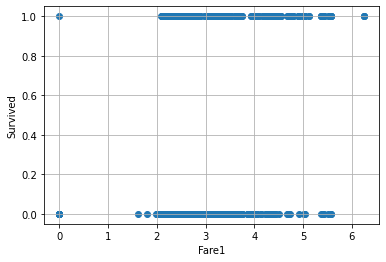

In [164]:
plt.scatter(train.Fare1, train.Survived)
plt.xlabel('Fare1')
plt.grid()
plt.ylabel('Survived')

In [165]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
feature_cols = ['Fare1']
X = train[feature_cols]
#print(X)
y = train.household
#print(y)
logreg.fit(X, y)

#testX = alldata[feature_cols][891:]

train['pred_y'] = logreg.predict(X)



Text(0, 0.5, 'Survived')

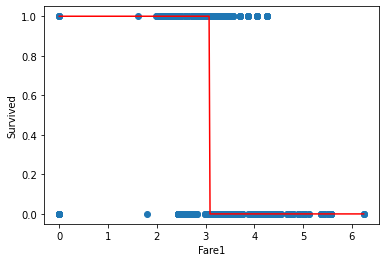

In [166]:
# plot the class predictions
plt.scatter(X, y)
plt.plot( X,  train.pred_y, color='red')
plt.xlabel('Fare1')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

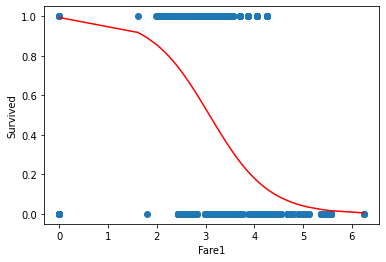

In [167]:
train['pred_prob'] = logreg.predict_proba(X)[:, 1]

plt.scatter(X,y)
plt.plot(X, train.pred_prob, color='red')
plt.xlabel('Fare1')
plt.ylabel('Survived')

Loss Function



<font color=black  face=Courier>

----------
    
**Unbiased Estimation**
</font>

<font color=black  face=Courier>
    
-------------
    
**Bias and Variance**
</font>

<font color=black  face=Courier>
    
-------------
    
**L1 and L2 Regularization Methods - Control the trade-off between variance and bias**
</font>

Question:
1. Why can't directly use linear regression for classification?
2. 
3. What impact will l1 and l2 regularization have on the model, and why?